# Machine Learning Experimentation

In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import time

sns.set_style('darkgrid')

font = {'size': 18}
matplotlib.rc('font', **font)
df = pd.read_pickle("data/train_full.pkl")

## Adding document vector columns

In [115]:
# load in GoogleNews word vector data frame (associates each word with a 300-dimensional vector)
word_vecs = pd.read_pickle("data/word_vec_train.pkl")
vocab = list(word_vecs.index) # list of words in the word vector data frame
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) # had to run "import nltk & nltk.download('stopwords')" before this worked

### For each row, create the document vector for the title,
### which is simply the mean of the word vectors for each 
### word in the row
def get_doc_vec(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()]
    doc = [word for word in doc if word in vocab]
    word_vectors = [word_vecs.loc[word] for word in doc]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(300)

Gets 15-dimensional document vectors for each title.

In [116]:
tic = time.perf_counter()
title_vecs = []
for title in df.title:
    title_vecs.append(get_doc_vec(title))
toc = time.perf_counter()
print(f"Generating document vectors took {toc - tic:0.2f} seconds")

# dimensionality reduction to make them 15 dimensional
tic = time.perf_counter()
from sklearn.decomposition import PCA
pca = PCA(n_components = 15, random_state=10)
reduced_title_vecs = pca.fit_transform(title_vecs)
toc = time.perf_counter()
print(f"PCA took {toc - tic:0.2f} seconds for the titles")

### Add new doc vecs and df together to make df2
title_vec_df = pd.DataFrame(reduced_title_vecs)
title_vec_df['title'] = list(df.title)
df2 = df.copy(deep=True)
for i in range(15):
    df2['title_vec_'+str(i)] = list(title_vec_df[i])
df2.head()

Generating document vectors took 90.49 seconds
PCA took 8.33 seconds for the titles


,title,selftext,num_user_comments,median_user_comment_score,max_user_comment_score,median_user_submission_score,max_user_submission_score,title_length,selftext_length,account_age_in_days,...,title_vec_5,title_vec_6,title_vec_7,title_vec_8,title_vec_9,title_vec_10,title_vec_11,title_vec_12,title_vec_13,title_vec_14
0,Refinance my home to free up VA loan or wait?,First let me say thank you for looking at my p...,94,1.0,1871.0,3.0,25906.0,45,1119,1711,...,0.154068,0.247290,-0.254865,-0.074706,0.012286,-0.209845,-0.142833,-0.121779,0.034462,-0.057537
1,Thank you for being such a great resource; you...,[removed],0,0.0,0.0,6.0,4888.0,82,9,4030,...,-0.117939,0.173250,-0.135397,0.072369,-0.076752,0.038594,0.045877,-0.039308,0.005682,0.057338
2,"401k vs 457b, not sure which to max first",My work has both the 401k and 457b plans. They...,0,0.0,0.0,0.0,0.0,41,576,4209,...,-0.149564,0.233118,-0.383484,-0.023185,-0.091743,-0.216232,0.122335,0.018077,-0.125292,-0.116175
3,"Student Loans, Interest Rate, and Payment Stra...",I'll be attending graduate school soon. Tuitio...,0,0.0,0.0,2.0,490.0,59,381,1300,...,0.090096,-0.137941,-0.072417,-0.186384,0.125709,-0.043674,-0.138492,0.330588,-0.011789,-0.202053
4,What do I put under Gross Income when applying...,I'm applying for a Discover Secured Credit Car...,29,1.0,3.0,1.5,42.0,64,335,309,...,-0.323602,0.068687,0.033118,0.019221,-0.153715,0.081396,0.043083,-0.259490,-0.025280,-0.085683


Gets 15-dimensional document vectors for each selftext

In [123]:
tic = time.perf_counter()
selftext_vecs = []
for selftext in df.selftext:
    selftext_vecs.append(get_doc_vec(selftext))
toc = time.perf_counter()
print(f"Generating document vectors took {toc - tic:0.2f} seconds")

# dimensionality reduction to make them 15 dimensional
tic = time.perf_counter()
from sklearn.decomposition import PCA
pca = PCA(n_components = 15, random_state=10)
reduced_selftext_vecs = pca.fit_transform(selftext_vecs)
toc = time.perf_counter()
print(f"PCA took {toc - tic:0.2f} seconds")

### Add new doc vecs and df together to make df2
selftext_vec_df = pd.DataFrame(reduced_selftext_vecs)
selftext_vec_df['self_text'] = list(df.selftext)
df3 = df2.copy(deep=True)
for i in range(15):
    df3['selftext_vec'+str(i)] = list(selftext_vec_df[i])
df3.head()

Generating document vectors took 758.55 seconds
PCA took 7.78 seconds


,title,selftext,num_user_comments,median_user_comment_score,max_user_comment_score,median_user_submission_score,max_user_submission_score,title_length,selftext_length,account_age_in_days,...,selftext_vec5,selftext_vec6,selftext_vec7,selftext_vec8,selftext_vec9,selftext_vec10,selftext_vec11,selftext_vec12,selftext_vec13,selftext_vec14
0,Refinance my home to free up VA loan or wait?,First let me say thank you for looking at my p...,94,1.0,1871.0,3.0,25906.0,45,1119,1711,...,0.085660,-0.068681,0.030925,-0.010201,0.055268,-0.040947,0.018173,-0.006923,0.110468,-0.094580
1,Thank you for being such a great resource; you...,[removed],0,0.0,0.0,6.0,4888.0,82,9,4030,...,0.004317,0.002723,0.000512,0.001212,0.002189,-0.000921,-0.000616,0.000123,-0.000041,0.000903
2,"401k vs 457b, not sure which to max first",My work has both the 401k and 457b plans. They...,0,0.0,0.0,0.0,0.0,41,576,4209,...,0.063835,0.056863,-0.151565,0.020709,-0.104889,-0.044817,-0.029002,-0.057313,0.100660,-0.059267
3,"Student Loans, Interest Rate, and Payment Stra...",I'll be attending graduate school soon. Tuitio...,0,0.0,0.0,2.0,490.0,59,381,1300,...,-0.066411,-0.044363,-0.068872,0.099383,0.030806,-0.096908,-0.015142,0.110724,-0.004037,-0.019096
4,What do I put under Gross Income when applying...,I'm applying for a Discover Secured Credit Car...,29,1.0,3.0,1.5,42.0,64,335,309,...,-0.054596,-0.085318,-0.164699,0.166469,-0.024353,0.022308,0.075647,0.089482,-0.020785,0.130532


## Machine Learning

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [150]:
df4 = df3.drop(['title', 'selftext', 'score', 'num_comments', 'virality_score'], axis=1)
#df4 = pd.get_dummies(df4, prefix='weekday', columns=['weekday']) (did not help)
X = df4.drop('is_viral', axis=1)
y = df4['is_viral'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [126]:
def powerset(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
    return power_set[1:]

doc_vec = ['docvec_'+str(i) for i in range(15)]

In [161]:
values = [i for i in np.arange(10,200,10)]
precisions = []
recalls = []
f1s = []
for value in values:
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, 
                                n_estimators=value, 
                                max_depth=9,
                                eval_metric='logloss') 
    feature_list = [X.columns] # all columns
    max_f1 = 0
    max_f1_features = []
    for features in feature_list:
        tic = time.perf_counter()
        model = clone(xgb_clf)
        model.fit(X_train[features], y_train)
        preds = model.predict(X_test[features])
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        if f1 > max_f1:
            max_f1 = f1
            max_f1_features = list(set(features) - set(doc_vec))
        toc = time.perf_counter()
        print("*************")
        #print("Features:", list(set(features) - set(doc_vec)))
        print(f"Number of estimators: {value:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"f1: {f1:.3f}")
        print(confusion_matrix(y_test, preds))
        print(f"Runtime: {toc-tic:.3f}")

*************
Number of estimators: 10.000
Precision: 0.657
Recall: 0.010
f1: 0.021
[[22786    12]
 [ 2168    23]]
Runtime: 3.236
*************
Number of estimators: 20.000
Precision: 0.442
Recall: 0.019
f1: 0.037
[[22745    53]
 [ 2149    42]]
Runtime: 6.262
*************
Number of estimators: 30.000
Precision: 0.474
Recall: 0.025
f1: 0.047
[[22738    60]
 [ 2137    54]]
Runtime: 8.614
*************
Number of estimators: 40.000
Precision: 0.441
Recall: 0.029
f1: 0.054
[[22718    80]
 [ 2128    63]]
Runtime: 11.106
*************
Number of estimators: 50.000
Precision: 0.417
Recall: 0.031
f1: 0.058
[[22703    95]
 [ 2123    68]]
Runtime: 14.489
*************
Number of estimators: 60.000
Precision: 0.417
Recall: 0.036
f1: 0.066
[[22689   109]
 [ 2113    78]]
Runtime: 16.322
*************
Number of estimators: 70.000
Precision: 0.439
Recall: 0.039
f1: 0.072
[[22688   110]
 [ 2105    86]]
Runtime: 19.635
*************
Number of estimators: 80.000
Precision: 0.423
Recall: 0.037
f1: 0.069
[[

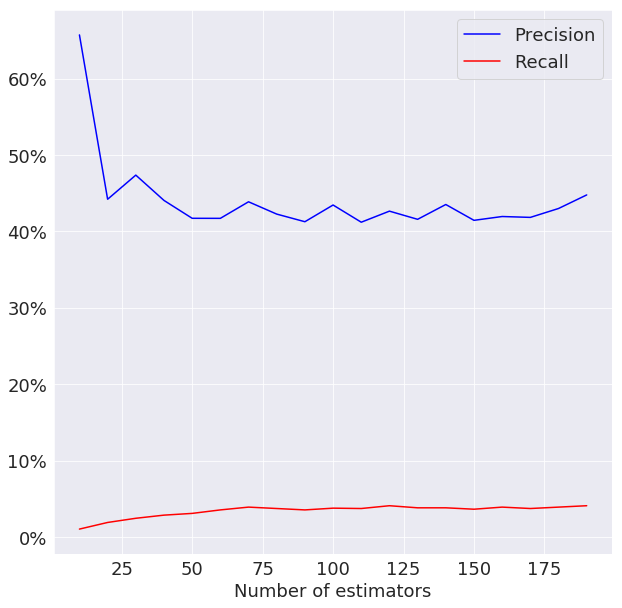

In [163]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.plot(values, precisions, c='blue', label='Precision')
plt.plot(values, recalls, c='red', label='Recall')
plt.xlabel('Number of estimators')
plt.legend()
plt.show()